In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_california_housing

In [13]:
dataset=fetch_california_housing()

In [14]:
df=pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])

In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## Exploratory Data Ananlysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [18]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [22]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [19]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

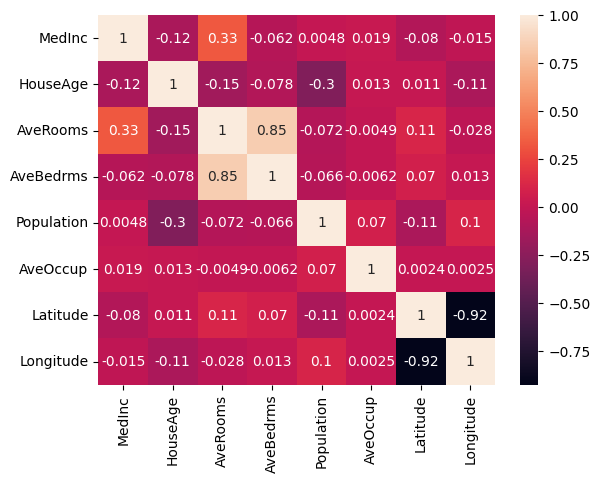

In [21]:
sns.heatmap(df.corr(),annot=True)

Here only latitute and longitute are highly co related which is kind of obvious

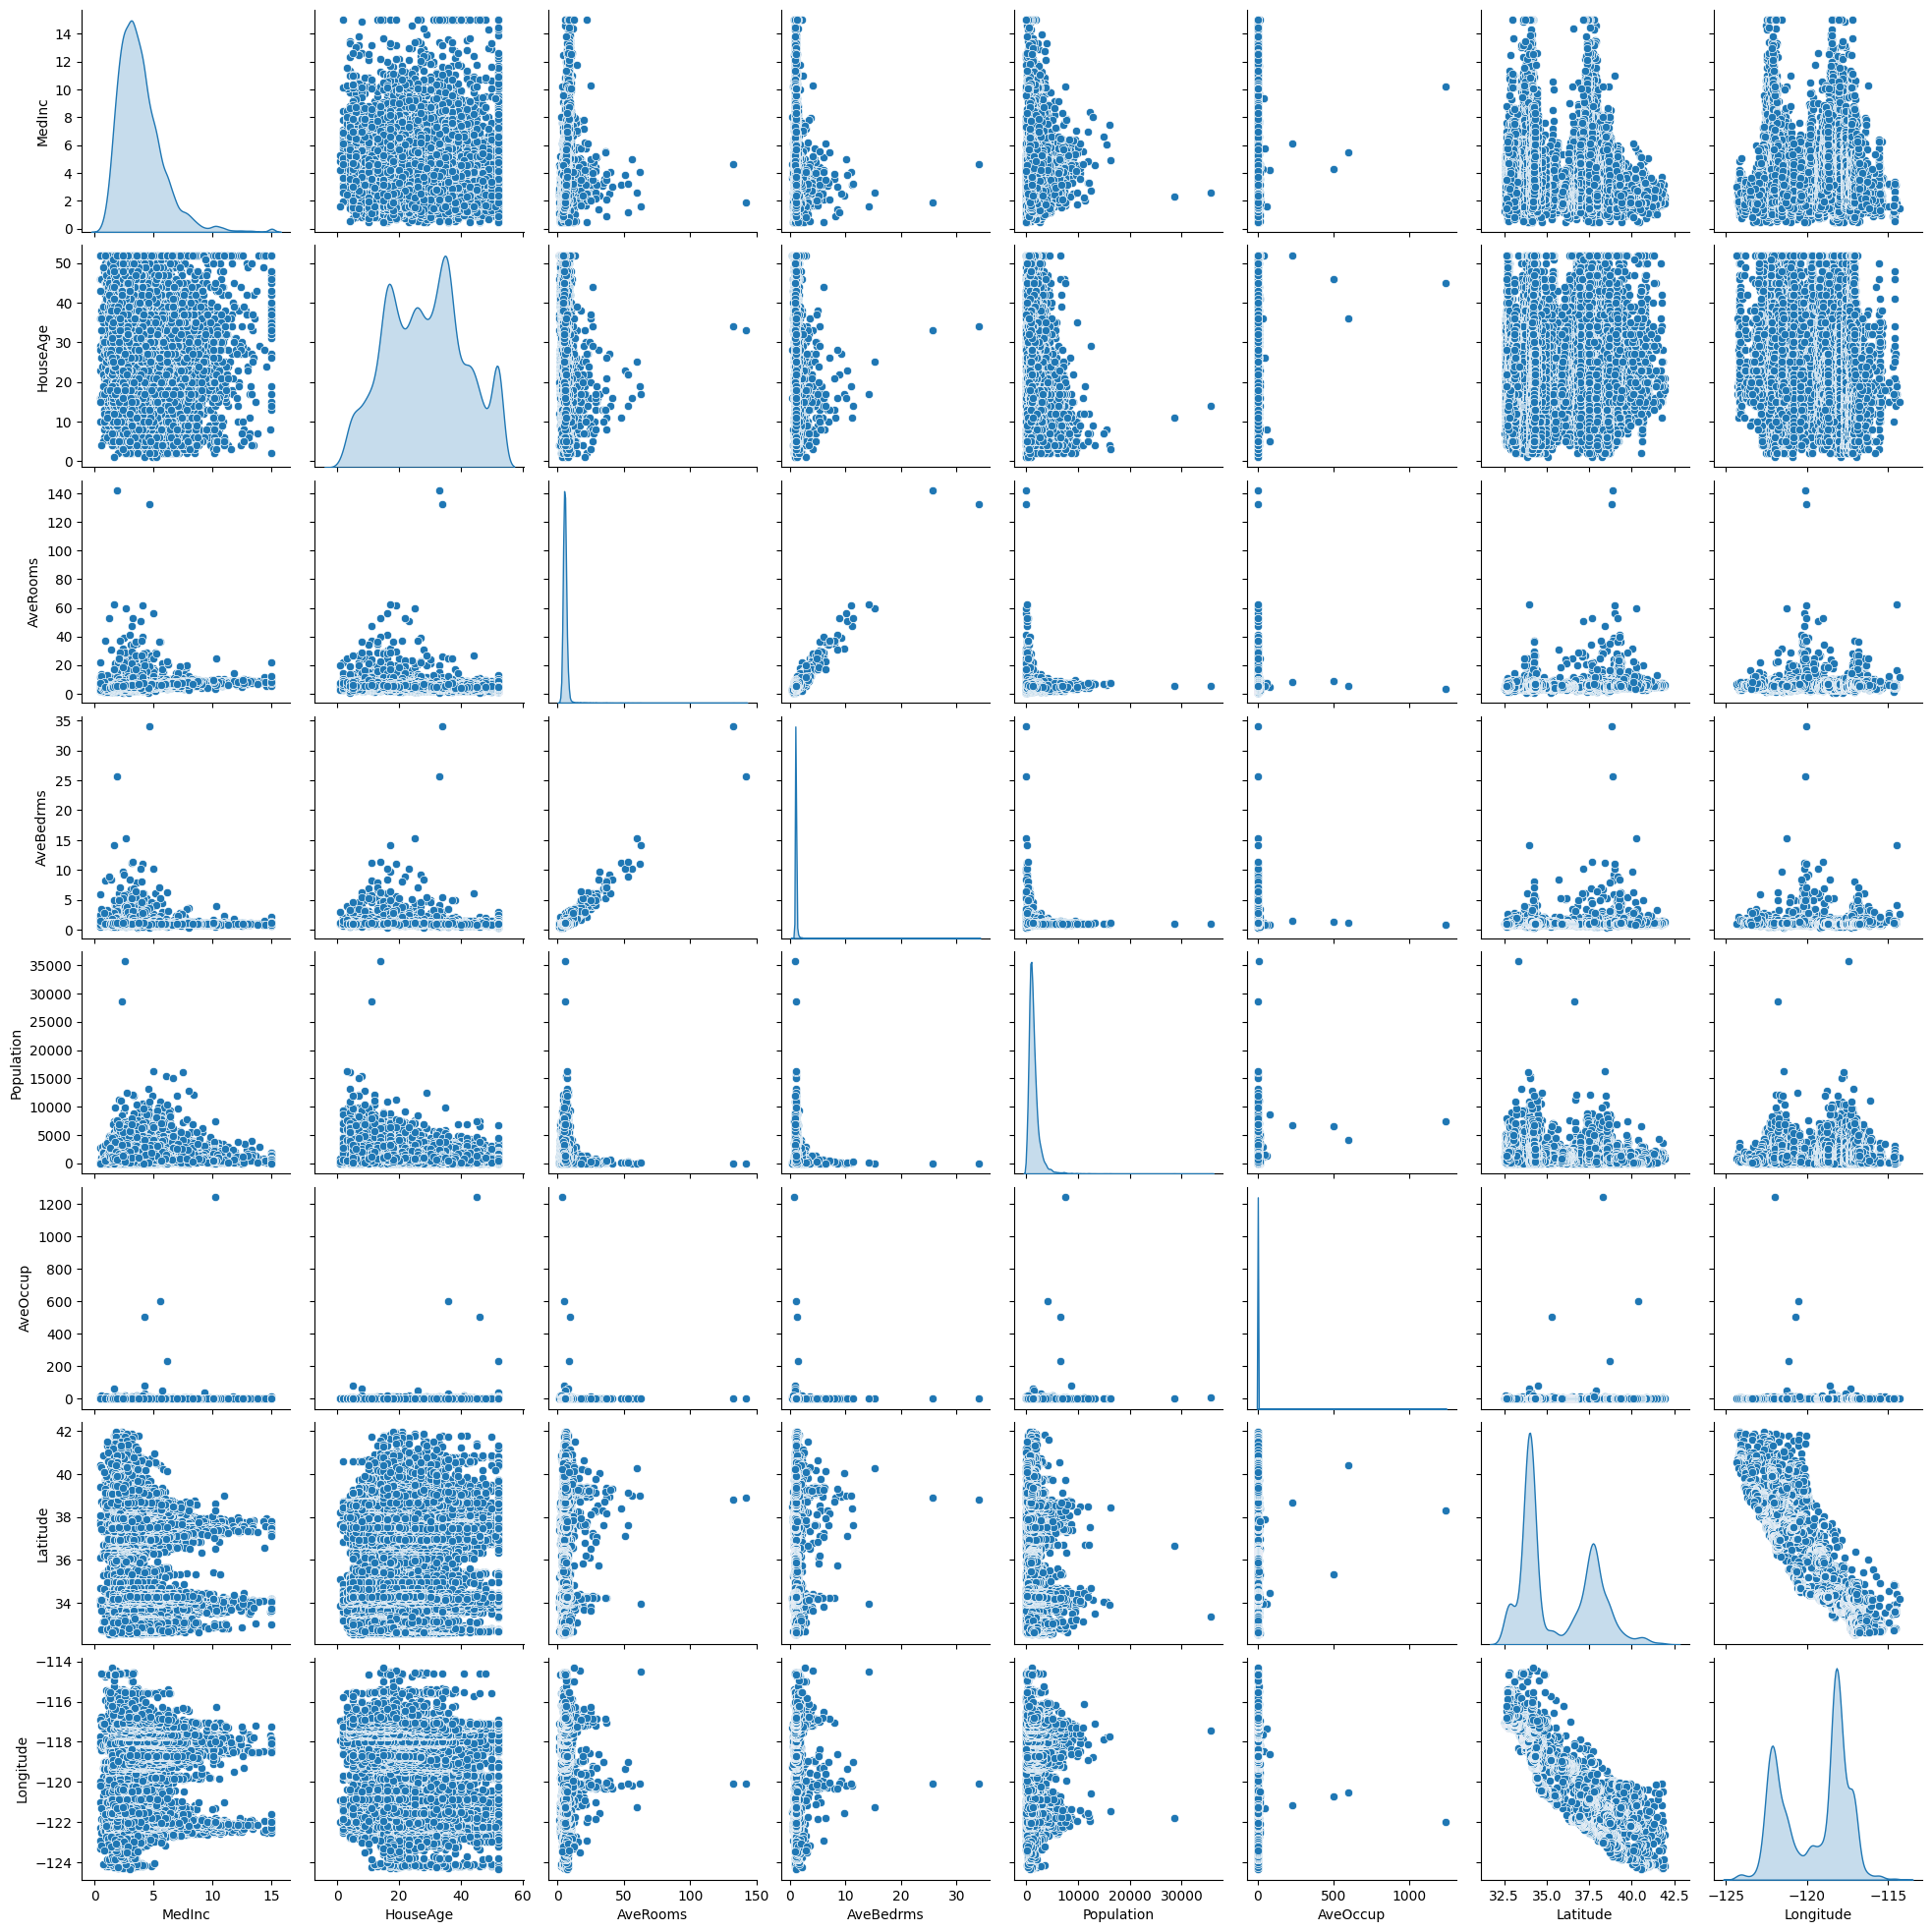

In [24]:
#pairwise relationship of the features
sns.pairplot(df, diag_kind='kde')
plt.show()

## Feature Selection And Splitting Datasets

In [25]:
from sklearn.model_selection import train_test_split
X=df
y=dataset.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train,X_test,y_train,y_test

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
 8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
 17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
 14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
 2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   
 ...       ...       ...       ...        ...         ...       ...       ...   
 11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
 11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
 5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
 860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
 15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   
 
        Longitude  
 14196

# Model Training

In [28]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [42]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [43]:
models={
    "Linear Regressor":LinearRegression(),
    "Ridge Regression":Ridge(alpha=1.0),
    "Lasso Regression":Lasso(alpha=0.001),
    "Random Forest":RandomForestRegressor(n_estimators=200,random_state=42),
    "AdaBoost":AdaBoostRegressor(n_estimators=200,random_state=42),
    "Gradient Boosting":GradientBoostingRegressor(n_estimators=200,random_state=42),
    "XGBoost":XGBRegressor(n_estimators=200,learning_rate=0.05,max_depth=4,random_state=42),
    "LightGBM":LGBMRegressor(n_estimators=300,learning_rate=0.05,random_state=42),
    "CatBoodt":CatBoostRegressor(n_estimators=300,learning_rate=0.05,depth=6,random_state=42),
}

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
results=[]
best_model=None
best_model_name=None
best_r2_score=0.0

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    results.append((name,mse,r2))

    if best_r2_score<r2:
        best_r2_score=r2
        best_model=model
        best_model_name=name

    print(f"{name} : mean sqaure error: {mse} mean absolute error : {mae} r2 score : {r2} \n\n")

Linear Regressor : mean sqaure error: 0.5558915986952444 mean absolute error : 0.5332001304956553 r2 score : 0.5757877060324508 


Ridge Regression : mean sqaure error: 0.5558034669932211 mean absolute error : 0.5332039182571153 r2 score : 0.5758549611440126 


Lasso Regression : mean sqaure error: 0.5538940157172418 mean absolute error : 0.5332857888017242 r2 score : 0.5773121026225017 


Random Forest : mean sqaure error: 0.2539759249192041 mean absolute error : 0.32681185043604677 r2 score : 0.8061857564039718 


AdaBoost : mean sqaure error: 0.614478459432694 mean absolute error : 0.6497879664773323 r2 score : 0.5310788695468394 


Gradient Boosting : mean sqaure error: 0.26149849837343114 mean absolute error : 0.34834284160114376 r2 score : 0.8004451261281281 


XGBoost : mean sqaure error: 0.26112014021089214 mean absolute error : 0.34558734064053886 r2 score : 0.8007338590113895 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 sec

In [45]:
best_model

LGBMRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

In [46]:
best_r2_score

0.8455986095322606

In [47]:
import pickle
with open('best_model.pkl',"wb") as f:
    pickle.dump(best_model,f)
